In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [2]:
train = pd.read_csv('/home/siarhei/Programming/ML/Data/House-Prices/train.csv')
test = pd.read_csv('/home/siarhei/Programming/ML/Data/House-Prices/test.csv')

train['train_test'] = 1
test['train_test'] = 0

all_data = pd.concat([train, test])
all_data.shape

pd.set_option('display.max_rows', False)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,1
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,1
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,1
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
...,...,...,...,...,...,...,...,...


In [6]:
with open('/home/siarhei/Programming/ML/Data/House-Prices/data_description.txt') as f:
    [print(line, end='') for line in f.readlines()]

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [7]:
train.shape

(1460, 82)

In [8]:
test.shape

(1459, 81)

In [9]:
pd.set_option('display.max_rows', None)
train.isnull().sum(axis = 0)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
test.isnull().sum(axis = 0)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
print(f'Test : {test.dropna().shape}\nTrain : {train.dropna().shape}')

Test : (0, 81)
Train : (0, 82)


In [12]:
# I can't drop all Nan values because It'll drop all train and test examples;
#Let's go other way

to_drop = {'drop':set(),'possible_to_use':set()}
for i in test.columns:
    added = 0
    if train[i].isna().sum() > train[i].shape[0]*0.5:
        to_drop['drop'].add(i)
        added+=1
        
    if test[i].isna().sum() > test[i].shape[0]*0.5:
        to_drop['drop'].add(i)
        added+=1
        
    if added>0 and train[i].isna().sum()+test[i].isna().sum() < (train[i].shape[0]+test[i].shape[0])*0.5:
        to_drop['possible_to_use'].add(i)
        

print(f'Train : {to_drop[list(to_drop.keys())[0]]}\nPossible to use : {to_drop[list(to_drop.keys())[1]]}')

Train : {'FireplaceQu', 'Alley', 'MiscFeature', 'Fence', 'PoolQC'}
Possible to use : {'FireplaceQu'}


In [13]:
#all_data = all_data.drop(list(to_drop['drop']-to_drop['possible_to_use']), axis =1)
all_data = all_data.drop(list(to_drop['drop']), axis =1)
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

<AxesSubplot:>

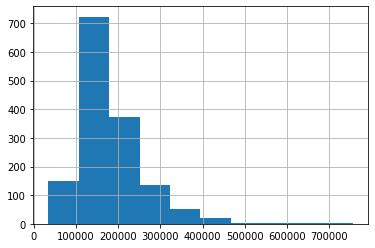

In [14]:
all_data.SalePrice.hist()

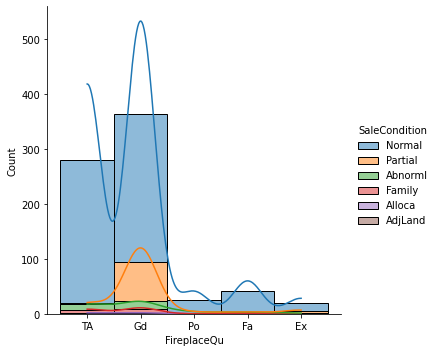

In [15]:
sns.displot(x='FireplaceQu',
            hue='SaleCondition',
            multiple='stack',
            kde=True,
            data=test);

In [16]:
all_data = pd.get_dummies(all_data[all_data.columns])

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [18]:
#after one-hot enc i can split data back to test and train
X_train = all_data[all_data.train_test == 1].drop(['train_test'], axis =1)
y_train = X_train.SalePrice
X_train = X_train.drop(['SalePrice'], axis=1)

X_test = all_data[all_data.train_test == 0].drop(['train_test','SalePrice'], axis =1)

In [19]:
#fill all numeric Nan with median in test and train
numeric = all_data.drop(['train_test'], axis =1)._get_numeric_data().columns
numeric = numeric.drop(['SalePrice'])

for i in numeric:
    if X_train[i].isna().sum()!=0:
        X_train[i] = X_train[i].fillna(X_train[i].median())
    if X_test[i].isna().sum()!=0:
        X_test[i] = X_test[i].fillna(X_test[i].median())

In [20]:
#Scale data
scale = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric] = scale.fit_transform(X_train_scaled[numeric])
X_test_scaled[numeric] = scale.fit_transform(X_test_scaled[numeric])

print(f'X - {X_train.shape}\nY - {y_train.shape}')

X - (1460, 271)
Y - (1460,)


# Models

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LinearRegression, ARDRegression

from xgboost import XGBRegressor, XGBRFRegressor

In [22]:
#1. LinearRegression sklearn
model_sk_reg = LinearRegression()
model_sk_reg.fit(X_train, y_train)
cv = cross_val_score(model_sk_reg, X_train, y_train, cv=8)
print(f'CV = {cv} \nMean = {cv.mean()}')

CV = [0.89648699 0.86633728 0.78315989 0.88620413 0.73368047 0.88408258
 0.88485418 0.36174095] 
Mean = 0.7870683083971397


In [23]:
#2. ARDRegression
model_ard = ARDRegression()
model_ard.fit(X_train, y_train)
cv = cross_val_score(model_ard, X_train, y_train, cv=8)
print(f'CV = {cv} \nMean = {cv.mean()}')

CV = [0.91041077 0.88468215 0.82106319 0.87223811 0.86715812 0.88276468
 0.83316482 0.51920246] 
Mean = 0.8238355362548893


In [24]:
#3. XGBRegression
model_xgbr = XGBRegressor()
model_xgbr.fit(X_train, y_train)
cv = cross_val_score(model_xgbr, X_train, y_train, cv=8)
print(f'CV = {cv} \nMean = {cv.mean()}')

CV = [0.89457716 0.89212042 0.80732884 0.88246965 0.83743532 0.89500939
 0.81294256 0.83359766] 
Mean = 0.856935124830898


In [25]:
#4. XGBFRegression
model_xgbrf = XGBRFRegressor()
model_xgbrf.fit(X_train, y_train)
cv = cross_val_score(model_xgbrf, X_train, y_train, cv=8)
print(f'CV = {cv} \nMean = {cv.mean()}')

CV = [0.85742939 0.88719195 0.80168304 0.86230426 0.85362201 0.84880389
 0.79464181 0.78108585] 
Mean = 0.8358452745470076


In [26]:
model_sk_reg_pred = model_sk_reg.predict(X_test)
model_ard_pred = model_ard.predict(X_test)
model_xgbr_pred = model_xgbr.predict(X_test)
model_xgbrf_pred = model_xgbrf.predict(X_test)

basic_submission = {'Id': test.Id, 'SalePrice': model_sk_reg_pred}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('/home/siarhei/Programming/ML/Data/House-Prices/base_submission_sk_reg8', index=False)

basic_submission = {'Id': test.Id, 'SalePrice': model_ard_pred}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('/home/siarhei/Programming/ML/Data/House-Prices/base_submission_ard8', index=False)

basic_submission = {'Id': test.Id, 'SalePrice': model_xgbr_pred}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('/home/siarhei/Programming/ML/Data/House-Prices/base_submission_xgbr8', index=False)

basic_submission = {'Id': test.Id, 'SalePrice': model_xgbrf_pred}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('/home/siarhei/Programming/ML/Data/House-Prices/base_submission_xgbrf8', index=False)